# Problem Statement

This data was extracted from the census bureau database found at

http://www.census.gov/ftp/pub/DES/www/welcome.html

Donor: Ronny Kohavi and Barry Becker, Data Mining and
Visualization

Silicon Graphics.

e-mail: ronnyk@sgi.com for questions.

Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

48842 instances, mix of continuous and discrete (train=32561, test=16281)

45222 if instances with unknown values are removed (train=30162, test=15060)

Duplicate or conflicting instances : 6

Class probabilities for adult.all file

Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)

Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:

((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:

1. Discretized a gross income into two ranges with threshold 50,000.

2. Convert U.S. to US to avoid periods.

3. Convert Unknown to "?"

4. Run MLC++ GenCVFiles to generate data,test.

Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.

These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.

### Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

### Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
### Problem 2:
Which factors are important
### Problem 3:
Which algorithms are best for this dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                        header = None, skipinitialspace=True)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ,
                       skiprows = 1, delimiter=',', skipinitialspace=True, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
                'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Shape of the train and test data
print(train_set.shape)
print(test_set.shape)

(32561, 15)
(16281, 15)


In [5]:
#Number of unique values in each column
print(train_set.nunique())
print(test_set.nunique())

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
wage_class            2
dtype: int64
age                  73
workclass             9
fnlwgt            12787
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        113
capital_loss         82
hours_per_week       89
native_country       41
wage_class            2
dtype: int64


In [6]:
# Check for Null Data
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
# Replace All Null Data in NaN
train_set = train_set.fillna(np.nan)

In [8]:
train_set.tail(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Mapping wage_class into two categories

In [10]:
train_set['wage_class'] = train_set['wage_class'].map({'<=50K': 0, '>50K': 1})
test_set['wage_class'] = test_set['wage_class'].map({'<=50K.': 0, '>50K.': 1})

In [11]:
train_set = train_set[(train_set != '?').all(axis=1)]
test_set = test_set[(test_set != '?').all(axis=1)]

/home/shreya/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','wage_class']

# Identify Categorical features
cat_features = ['workclass','education','marital_status', 'occupation', 'relationship',
                'race', 'sex', 'native_country']

<AxesSubplot:xlabel='wage_class', ylabel='count'>

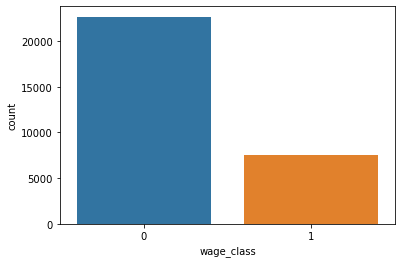

In [13]:
sns.countplot(x='wage_class', data=train_set)

<AxesSubplot:xlabel='native_country', ylabel='count'>

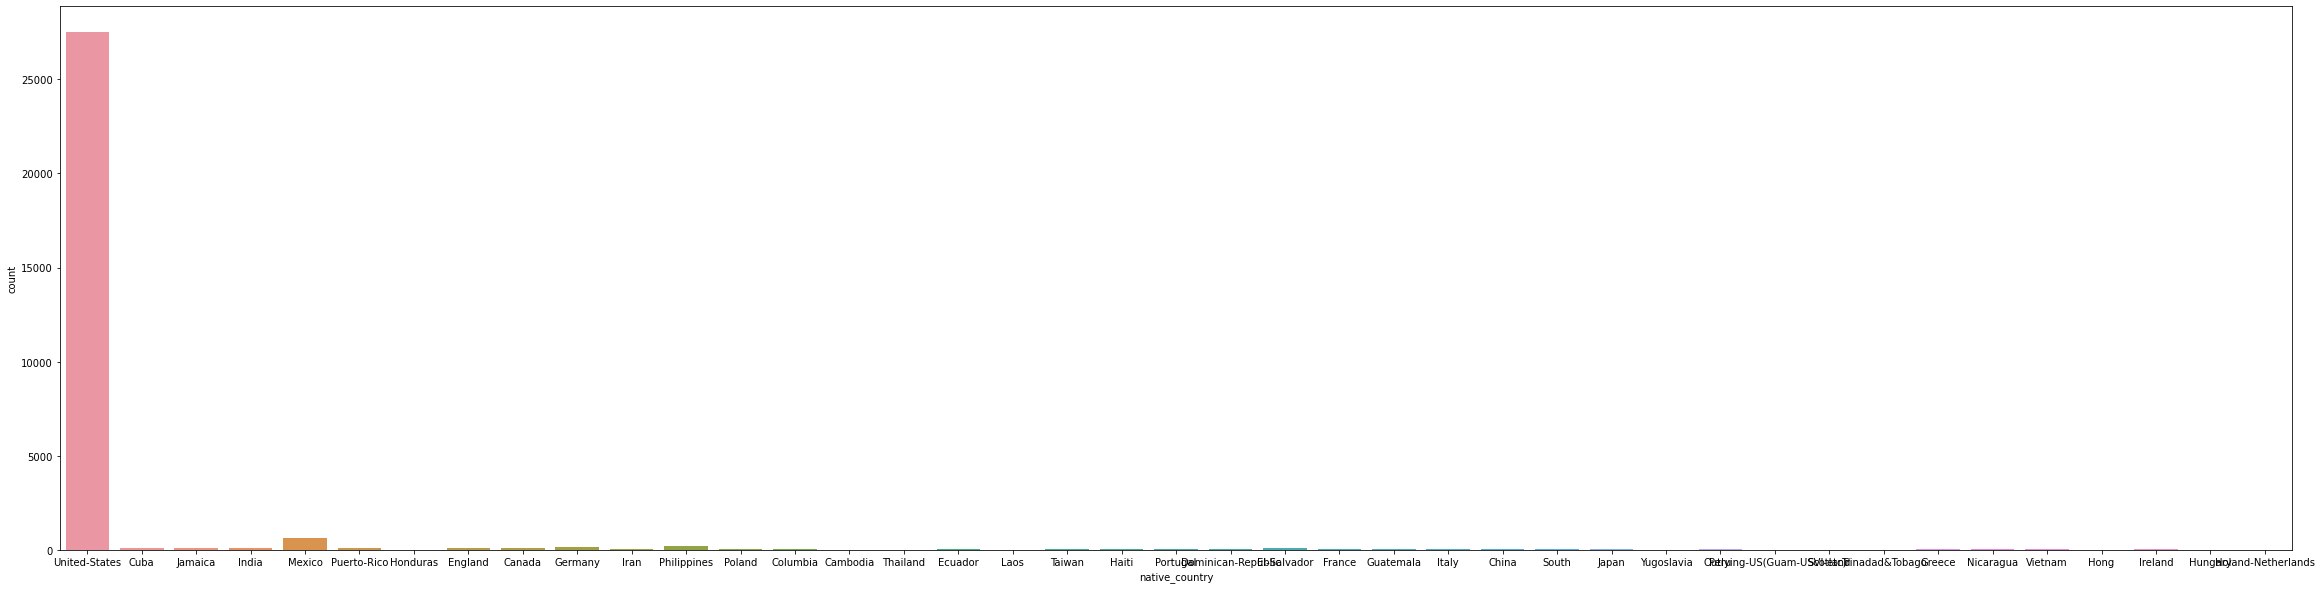

In [14]:
plt.figure(figsize=(40, 10))
sns.countplot(x='native_country', data=train_set)

We need to drop the country column as it will create bias.

In [15]:
train_set.drop('native_country', axis=1, inplace=True)
test_set.drop('native_country', axis=1, inplace=True)

Dividing into age bins

<AxesSubplot:xlabel='ages', ylabel='count'>

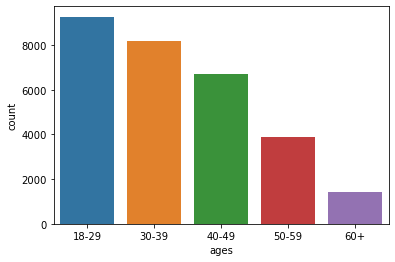

In [16]:
train_set['ages'] = pd.cut(train_set['age'], bins=[18, 30, 40, 50, 60, 70], 
                           labels=['18-29', '30-39', '40-49', '50-59', '60+'], include_lowest = True)
test_set['ages'] = pd.cut(test_set['age'], bins=[18, 30, 40, 50, 60, 70], 
                           labels=['18-29', '30-39', '40-49', '50-59', '60+'], include_lowest = True)
sns.countplot(x='ages', data=train_set)

<AxesSubplot:xlabel='race', ylabel='count'>

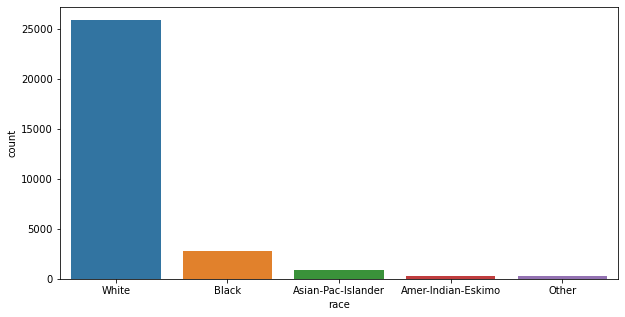

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='race', data=train_set)

In [18]:
train_set['race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

Since race column is very unbalanced it might increase bias so we need to drop this column.

In [19]:
train_set.drop('race', axis=1, inplace=True)
test_set.drop('race', axis=1, inplace=True)

Dividing hours per week into hour bins

<AxesSubplot:xlabel='hours', ylabel='count'>

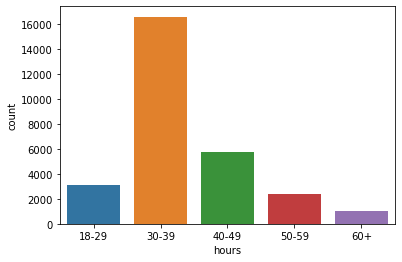

In [20]:
train_set['hours'] = pd.cut(train_set['hours_per_week'], bins=[18, 30, 40, 50, 60, 100], 
                           labels=['18-29', '30-39', '40-49', '50-59', '60+'], include_lowest = True)
test_set['hours'] = pd.cut(test_set['hours_per_week'], bins=[18, 30, 40, 50, 60, 100], 
                           labels=['18-29', '30-39', '40-49', '50-59', '60+'], include_lowest = True)
sns.countplot(x='hours', data=train_set)

<AxesSubplot:xlabel='sex', ylabel='count'>

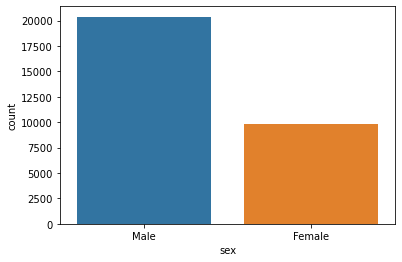

In [21]:
sns.countplot(x='sex', data=train_set)

Finding the correlation 

<AxesSubplot:>

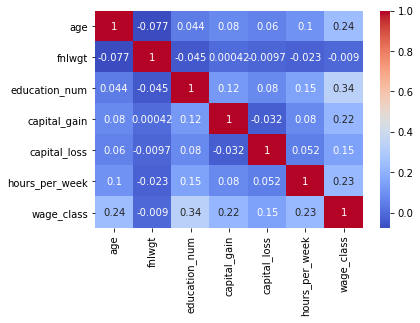

In [22]:
sns.heatmap(train_set.corr(), cmap='coolwarm', annot=True)

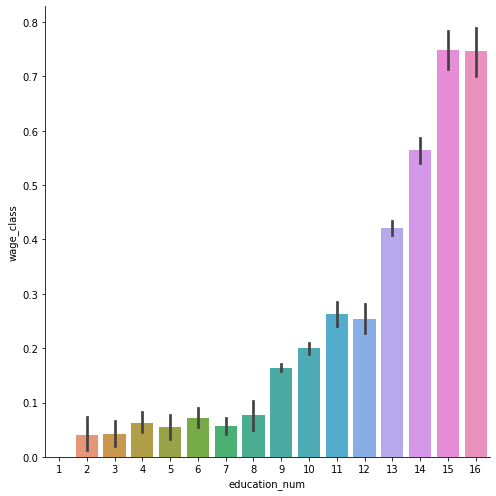

In [23]:
sns.catplot(x='education_num', y='wage_class', data=train_set, kind='bar', height=7)

Since education and education_num are highly correlated. Education_num is basically education written as numbers. We will drop education column

In [24]:
train_set.drop('education', axis=1, inplace=True)
test_set.drop('education', axis=1, inplace=True)

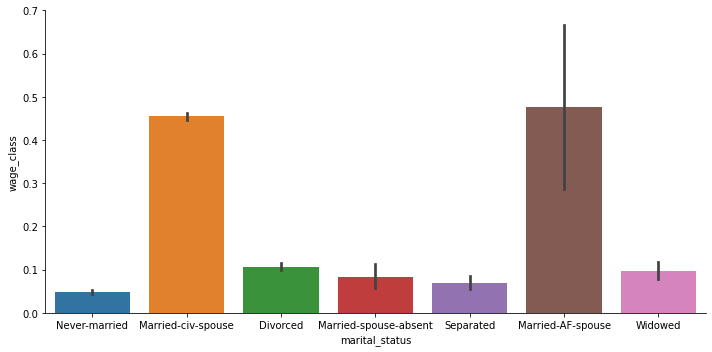

In [25]:
sns.catplot(x='marital_status', y='wage_class', data=train_set, kind='bar', height=5, aspect=2)

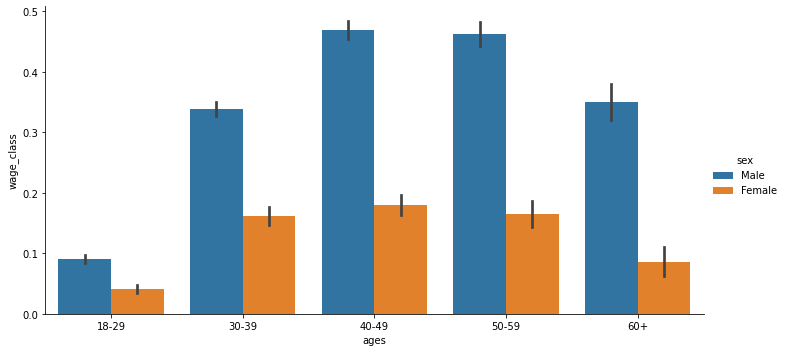

In [26]:
sns.catplot(x='ages', y='wage_class', data=train_set, kind='bar', hue='sex', height=5, aspect=2)

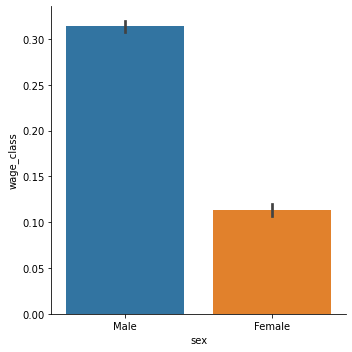

In [27]:
sns.catplot(x='sex', y='wage_class', data=train_set, kind='bar')

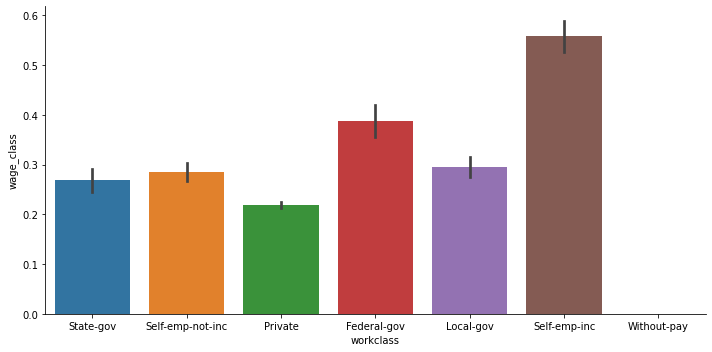

In [28]:
sns.catplot(x='workclass', y='wage_class', data=train_set, kind='bar', height=5, aspect=2)

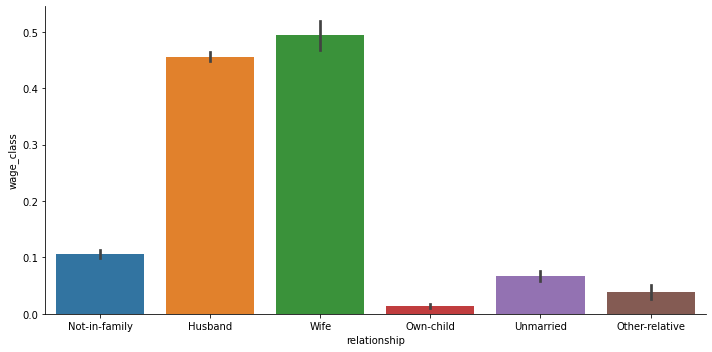

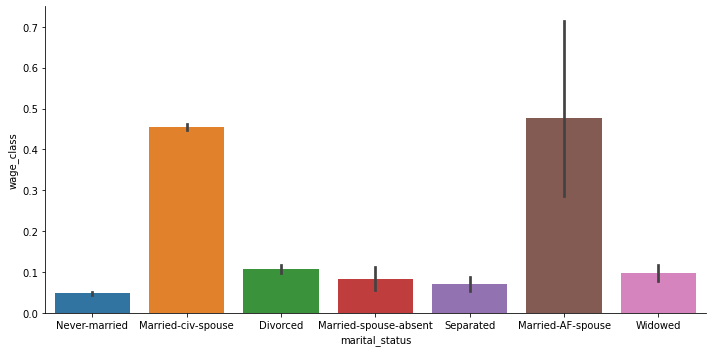

In [29]:
sns.catplot(x='relationship', y='wage_class', kind='bar', data=train_set, height=5, aspect=2 )
sns.catplot(x='marital_status', y='wage_class', kind='bar', data=train_set, height=5, aspect=2)

Relationship is similar to marital_status so we will drop relaationship column

In [30]:
train_set.drop('relationship', axis=1, inplace=True)
test_set.drop('relationship', axis=1, inplace=True)

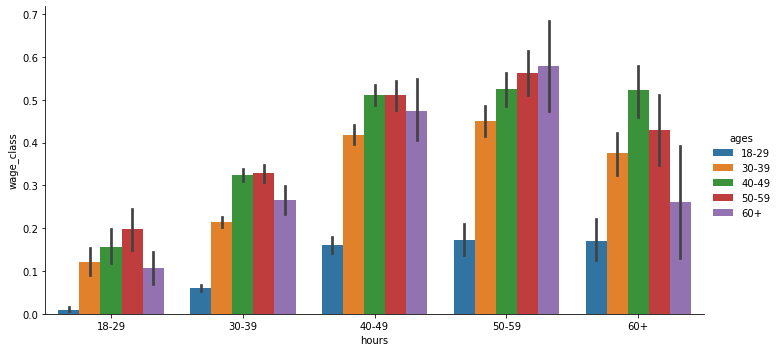

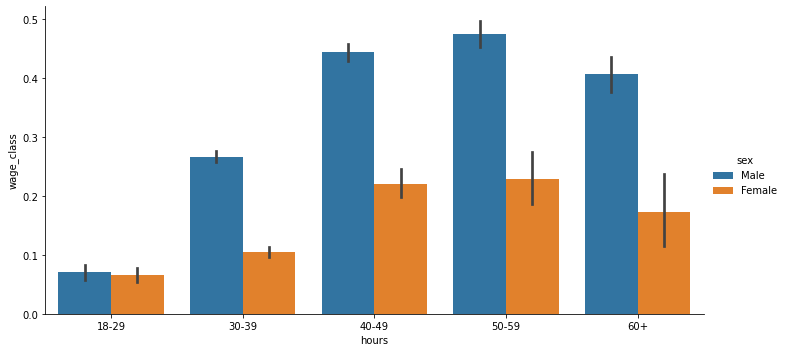

In [31]:
sns.catplot(x='hours', y='wage_class', kind='bar', data=train_set, hue='ages', height=5, aspect=2)
sns.catplot(x='hours', y='wage_class', kind='bar', data=train_set, hue='sex', height=5, aspect=2)

We will also drop occupation column

In [32]:
train_set.drop('occupation', axis=1, inplace=True)
test_set.drop('occupation', axis=1, inplace=True)

Converting marital_status into two categories as married and single

In [33]:
train_set["marital_status"] = train_set["marital_status"].replace(
    ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
train_set["marital_status"] = train_set["marital_status"].replace(
    ['Never-married','Divorced','Separated','Widowed'], 'Single')
train_set["marital_status"] = train_set["marital_status"].map({"Married":0, "Single":1})
train_set["marital_status"] = train_set["marital_status"]

test_set["marital_status"] = test_set["marital_status"].replace(
    ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
test_set["marital_status"] = test_set["marital_status"].replace(
    ['Never-married','Divorced','Separated','Widowed'], 'Single')
test_set["marital_status"] = test_set["marital_status"].map({"Married":0, "Single":1})
test_set["marital_status"] = test_set["marital_status"]

Dropping the nan values

In [34]:
train_set.dropna(inplace=True)
test_set.dropna(inplace=True)

Converting sex and workclass columns into one hot encoding

In [35]:
onehotencoder = preprocessing.OneHotEncoder()
X = onehotencoder.fit_transform(train_set['sex'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=['male', 'female'])
df.head()
train_set = pd.concat([train_set, df], axis=1)
train_set.drop(['sex'], axis=1, inplace=True)

X = onehotencoder.fit_transform(test_set['sex'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=['male', 'female'])
df.head()
test_set = pd.concat([test_set, df], axis=1)
test_set.drop(['sex'], axis=1, inplace=True)

In [36]:
train_set.dropna(inplace=True)
test_set.dropna(inplace=True)

In [37]:
a = train_set['workclass'].unique()

X = onehotencoder.fit_transform(train_set['workclass'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=a)
df.head()
train_set = pd.concat([train_set, df], axis=1)
train_set.drop(['workclass'], axis=1, inplace=True)

X = onehotencoder.fit_transform(test_set['workclass'].values.reshape(-1,1)).toarray()
df = pd.DataFrame(X.astype(int), columns=a)
df.head()
test_set = pd.concat([test_set, df], axis=1)
test_set.drop(['workclass'], axis=1, inplace=True)

In [38]:
train_set.dropna(inplace=True)
test_set.dropna(inplace=True)

Converting ages and hours range bins into numerical labels

In [39]:
train_set.drop(['age', 'hours_per_week'], axis=1, inplace=True)
test_set.drop(['age', 'hours_per_week'], axis=1, inplace=True)

train_set['ages'] = train_set['ages'].map({'18-29': 1, '30-39': 2, '40-49': 3, '50-59': 4, '60+': 5})
test_set['ages'] = test_set['ages'].map({'18-29': 1, '30-39': 2, '40-49': 3, '50-59': 4, '60+': 5})

train_set['hours'] = train_set['hours'].map({'18-29': 1, '30-39': 2, '40-49': 3, '50-59': 4, '60+': 5})
test_set['hours'] = test_set['hours'].map({'18-29': 1, '30-39': 2, '40-49': 3, '50-59': 4, '60+': 5})

y_train = train_set['wage_class']
x_train = train_set.drop('wage_class', axis=1)

y_test = test_set['wage_class']
x_test = test_set.drop('wage_class', axis=1)

Testing different algorithms

In [40]:
scoring = 'accuracy'
num_trees = 100
max_features = 3

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=2, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.781370 (0.008141)
LDA: 0.819697 (0.005547)
KNN: 0.755344 (0.009843)
CART: 0.787958 (0.008442)
NB: 0.780126 (0.007571)
XGB: 0.847659 (0.007759)
RF: 0.812465 (0.005882)
SVM: 0.778192 (0.009401)


XGBClassifier performs best on this dataset

In [41]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred = model.predict(x_test)

Printing the report of prediction

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      8059
         1.0       0.75      0.61      0.67      2721

    accuracy                           0.85     10780
   macro avg       0.81      0.77      0.79     10780
weighted avg       0.84      0.85      0.84     10780



The accuracy is of 86%